## ====================================================================================

## 1.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df=pd.read_csv('User_Data.csv')

In [17]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
df.drop('User ID',axis=1,inplace=True)

In [20]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df['Gender']=ohe.fit_transform(df[['Gender']]).toarray()

In [22]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0.0,19,19000,0
1,0.0,35,20000,0
2,1.0,26,43000,0
3,1.0,27,57000,0
4,0.0,19,76000,0


In [23]:
x=df.iloc[:,0:3]
y=df.iloc[:,3]

In [24]:
x.head()

,Gender,Age,EstimatedSalary
0,0.0,19,19000
1,0.0,35,20000
2,1.0,26,43000
3,1.0,27,57000
4,0.0,19,76000


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [27]:
from sklearn.preprocessing import StandardScaler    
st= StandardScaler()    
x_train= st.fit_transform(x_train)    
x_test= st.transform(x_test)  

In [28]:
x_train

array([[ 0.98019606,  0.58164944, -0.88670699],
       [-1.02020406, -0.60673761,  1.46173768],
       [ 0.98019606, -0.01254409, -0.5677824 ],
       [ 0.98019606, -0.60673761,  1.89663484],
       [ 0.98019606,  1.37390747, -1.40858358],
       [ 0.98019606,  1.47293972,  0.99784738],
       [-1.02020406,  0.08648817, -0.79972756],
       [-1.02020406, -0.01254409, -0.24885782],
       [ 0.98019606, -0.21060859, -0.5677824 ],
       [ 0.98019606, -0.21060859, -0.19087153],
       [ 0.98019606, -0.30964085, -1.29261101],
       [-1.02020406, -0.30964085, -0.5677824 ],
       [-1.02020406,  0.38358493,  0.09905991],
       [ 0.98019606,  0.8787462 , -0.59677555],
       [ 0.98019606,  2.06713324, -1.17663843],
       [-1.02020406,  1.07681071, -0.13288524],
       [ 0.98019606,  0.68068169,  1.78066227],
       [ 0.98019606, -0.70576986,  0.56295021],
       [ 0.98019606,  0.77971394,  0.35999821],
       [ 0.98019606,  0.8787462 , -0.53878926],
       [-1.02020406, -1.20093113, -1.582

In [29]:
x_test

array([[-1.02020406, -0.80480212,  0.50496393],
       [ 0.98019606, -0.01254409, -0.5677824 ],
       [-1.02020406, -0.30964085,  0.1570462 ],
       [ 0.98019606, -0.80480212,  0.27301877],
       [ 0.98019606, -0.30964085, -0.5677824 ],
       [-1.02020406, -1.10189888, -1.43757673],
       [ 0.98019606, -0.70576986, -1.58254245],
       [-1.02020406, -0.21060859,  2.15757314],
       [ 0.98019606, -1.99318916, -0.04590581],
       [-1.02020406,  0.8787462 , -0.77073441],
       [-1.02020406, -0.80480212, -0.59677555],
       [ 0.98019606, -1.00286662, -0.42281668],
       [-1.02020406, -0.11157634, -0.42281668],
       [-1.02020406,  0.08648817,  0.21503249],
       [-1.02020406, -1.79512465,  0.47597078],
       [ 0.98019606, -0.60673761,  1.37475825],
       [-1.02020406, -0.11157634,  0.21503249],
       [-1.02020406, -1.89415691,  0.44697764],
       [ 0.98019606,  1.67100423,  1.75166912],
       [-1.02020406, -0.30964085, -1.37959044],
       [ 0.98019606, -0.30964085, -0.654

In [30]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
y_pred= classifier.predict(x_test)  

In [32]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[63  5]
 [ 3 29]]


In [33]:
classifier.score(x_test,y_test)

0.92

In [1]:
63+29

92

## ====================================================================

## 2.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df=pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [14]:
df.shape

(16, 4)

In [15]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [16]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [19]:
inp=df.iloc[:,0:3]
ter=df.iloc[:,-1]
print(inp.head())
print(ter.head())

  company                  job     degree
0  google      sales executive  bachelors
1  google      sales executive    masters
2  google     business manager  bachelors
3  google     business manager    masters
4  google  computer programmer  bachelors
0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder
le_com=LabelEncoder()
le_job=LabelEncoder()
le_deg=LabelEncoder()

In [22]:
inp['com']=le_com.fit_transform(inp['company'])
inp['jo']=le_job.fit_transform(inp['job'])
inp['deg']=le_deg.fit_transform(inp['degree'])

In [73]:
'''
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

x['new_company']=le_company.fit_transform(x['company'])
x['new_job']=le_job.fit_transform(x['job'])
x['new_degree']=le_degree.fit_transform(x['degree'])
'''

In [23]:
inp.head()

,company,job,degree,com,jo,deg
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [24]:
inp=inp.drop(['company','job','degree'],axis='columns')

In [25]:
inp.head()

,com,jo,deg
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp,ter,train_size=0.8,random_state=2)

In [27]:
from sklearn.tree import DecisionTreeClassifier
mod=DecisionTreeClassifier()

In [28]:
mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
mod.score(x_test,y_test)

0.75

In [30]:
mod.predict(x_test)

array([1, 1, 1, 0], dtype=int64)

In [31]:
y_test

12    1
4     0
5     1
0     0
Name: salary_more_then_100k, dtype: int64

In [32]:
mod.predict([[2,2,1]])

array([0], dtype=int64)

In [33]:
y_pred=mod.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [35]:
cm

array([[1, 1],
       [0, 2]], dtype=int64)

<AxesSubplot:>

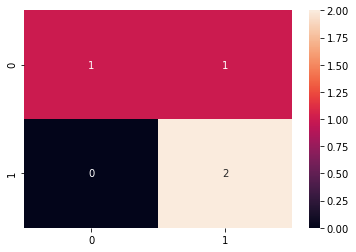

In [36]:
sns.heatmap(cm,annot=True)

[Text(279.0, 475.65000000000003, 'X[0] <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(167.39999999999998, 339.75, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(111.6, 203.85000000000002, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(55.8, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.39999999999998, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.2, 203.85000000000002, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(390.59999999999997, 339.75, 'X[1] <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(334.79999999999995, 203.85000000000002, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(446.4, 203.85000000000002, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(390.59999999999997, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(502.2, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

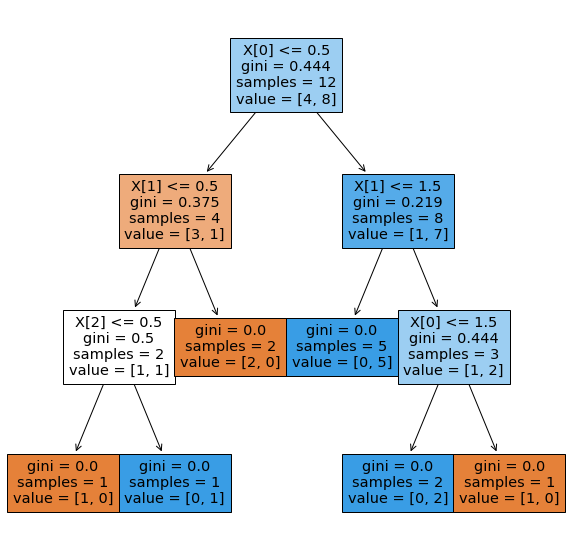

In [38]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(mod,filled=True)

In [39]:
print(tree.export_text(mod))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 1.50
|   |   |--- class: 1
|   |--- feature_1 >  1.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0



## =========================================================================

## 3.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
df=pd.read_csv('titanic_dt.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
df.drop(['PassengerId', 'Name','SibSp','Parch', 'Ticket','Cabin', 'Embarked'],axis=1,inplace=True)

In [44]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [45]:
df.shape

(891, 5)

In [46]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [47]:
df['Age']=df['Age'].fillna(df.Age.mean())

In [48]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [49]:
df.Sex = df.Sex.map({'male': 1, 'female': 2})

In [50]:
#from sklearn.preprocessing import OneHotEncoder

#ohe=OneHotEncoder()
#df['Sex']=ohe.fit_transform(df[['Sex']]).toarray()

In [51]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,2,38.0,71.2833
2,1,3,2,26.0,7.9250
3,1,1,2,35.0,53.1000
4,0,3,1,35.0,8.0500


In [52]:
x=df.drop('Survived',axis=1)
y=df.Survived

In [53]:
x.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [54]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [59]:
x_train

array([[ 0.83659324, -0.73334642, -0.02810499, -0.18801432],
       [-1.55559305,  1.36361202, -0.00541218,  0.53969044],
       [-0.35949991,  1.36361202,  0.29627125, -0.46350293],
       ...,
       [-0.35949991, -0.73334642, -0.6841999 ,  0.89773487],
       [ 0.83659324,  1.36361202, -0.02810499, -0.52724343],
       [ 0.83659324, -0.73334642, -0.6841999 , -0.51643995]])

In [60]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [61]:
model.score(x_test,y_test)

0.7374301675977654

In [62]:
model.score(x_train,y_train)

0.9845505617977528

In [63]:
y_pred=model.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [65]:
cm

array([[88, 18],
       [29, 44]], dtype=int64)

[Text(282.1512536337209, 530.01, 'X[1] <= 0.315\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(101.46529796511628, 502.83000000000004, 'X[2] <= -1.288\ngini = 0.3\nsamples = 463\nvalue = [378, 85]'),
 Text(17.302325581395348, 475.65000000000003, 'X[0] <= 0.239\ngini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(12.97674418604651, 448.47, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(21.627906976744185, 448.47, 'X[3] <= -0.24\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(8.651162790697674, 421.29, 'X[2] <= -1.514\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(4.325581395348837, 394.11, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(12.97674418604651, 394.11, 'X[2] <= -1.401\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(8.651162790697674, 366.93000000000006, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(17.302325581395348, 366.93000000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(34.604651162790695, 421.29, 'X[2] <= -2.004\ngini = 0.

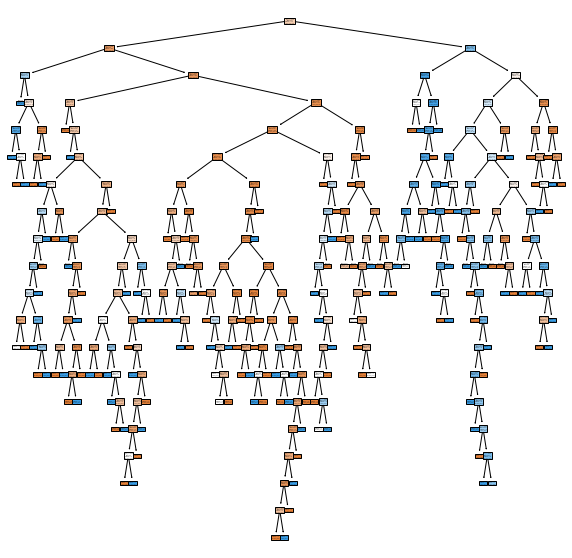

In [66]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)

In [67]:
print(tree.export_text(model))

|--- feature_1 <= 0.32
|   |--- feature_2 <= -1.29
|   |   |--- feature_0 <= 0.24
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.24
|   |   |   |--- feature_3 <= -0.24
|   |   |   |   |--- feature_2 <= -1.51
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  -1.51
|   |   |   |   |   |--- feature_2 <= -1.40
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -1.40
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -0.24
|   |   |   |   |--- feature_2 <= -2.00
|   |   |   |   |   |--- feature_2 <= -2.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -2.08
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  -2.00
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  -1.29
|   |   |--- feature_0 <= -0.96
|   |   |   |--- feature_3 <= -0.13
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.13
|   |   |   |   |--- feature_3 <= -0.12
|   |   |   |   |   |--- class:

## =====================================================================

## 4.

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('classification tree.xlsx')

In [3]:
df.head()

,Income,LotSize,ownership
0,60.0,18.4,1
1,85.5,16.8,1
2,64.8,21.6,1
3,64.5,20.8,1
4,78.0,23.6,1


In [4]:
x=df.drop('ownership',axis=1)
y=df['ownership']

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
x_train

array([[ 0.75518398, -1.11393534],
       [-0.90099606,  0.72647957],
       [-0.38438944, -2.0341428 ],
       [ 0.67921242, -0.74585236],
       [-0.0805032 ,  0.35839659],
       [ 1.8947574 , -0.74585236],
       [-1.08332781, -0.74585236],
       [ 0.37532617,  2.01477001],
       [-0.29322357,  1.09456255],
       [ 1.99605282, -0.00968639],
       [-0.56672119, -1.48201832],
       [ 1.13504179,  0.72647957],
       [ 0.61843517,  1.46264553],
       [-0.23244632, -0.37776938],
       [-0.30841788,  0.72647957],
       [-0.53633257, -0.37776938],
       [-1.90382068, -0.19372789],
       [-1.38721406,  0.54243808],
       [ 0.22338305,  0.1743551 ]])

In [16]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8

[Text(133.92000000000002, 181.2, 'X[0] <= -0.552\ngini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.266\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

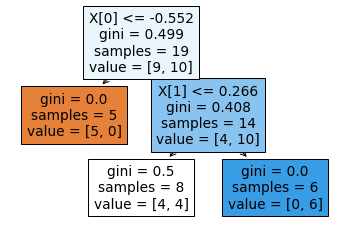

In [18]:
#import matplotlib.pyplot as plt
from sklearn import tree
#plt.figure(figsize=(10,10))

tree.plot_tree(model,filled=True)